In [1]:
# Loading the finite element package Amaru
using Revise
using Amaru

INFO: Recompiling stale cache file /home/raul/.julia/lib/v0.6/FemMesh.ji for module FemMesh.
INFO: Recompiling stale cache file /home/raul/.julia/lib/v0.6/Amaru.ji for module Amaru.


In [6]:
# Mesh generation
blocks = [
    Block3D( [0 0 0; 0.2 2.0 0.2], nx=2, ny=12, nz=2, shape=HEX8),
]

msh = Mesh(blocks, verbose=true);

Mesh generation:
  analyzing 1 block(s)
  3D mesh             
    117 points obtained
     48 cells obtained
    104 faces obtained
    208 surface edges obtained
  done.


In [10]:
isa(blocks[1], FemMesh.Block)

true

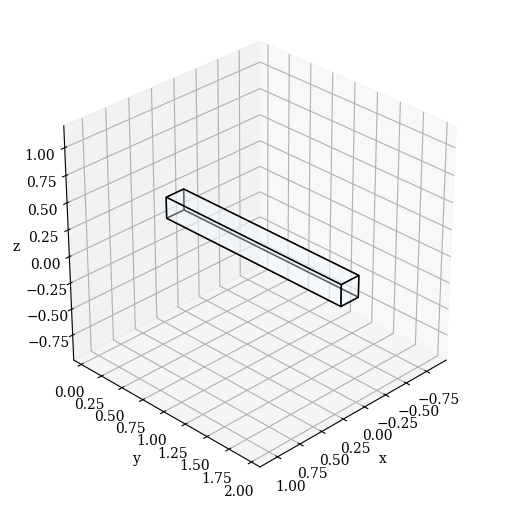

pts_arr = Array{Float64,1}[[0.0, 0.0, 0.0], [0.2, 0.0, 0.0], [0.2, 2.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 0.2], [0.2, 0.0, 0.2], [0.2, 2.0, 0.2], [0.0, 2.0, 0.2]]
coords = [0.0 0.0 0.0; 0.2 0.0 0.0; 0.2 2.0 0.0; 0.0 2.0 0.0; 0.0 0.0 0.2; 0.2 0.0 0.2; 0.2 2.0 0.2; 0.0 2.0 0.2]
conns = Array{Int64,1}[[1, 5, 8, 4], [2, 3, 7, 6], [1, 2, 6, 5], [3, 4, 8, 7], [1, 4, 3, 2], [5, 6, 7, 8]]
stypes = [9, 9, 9, 9, 9, 9]


In [29]:
mplot(blocks)

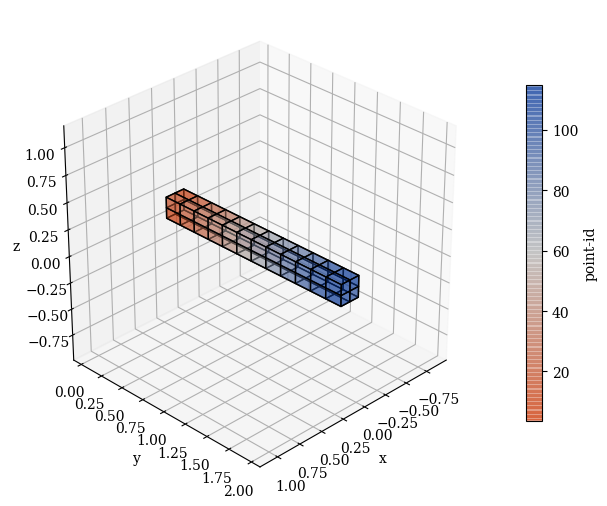

In [18]:
mplot(msh, field="point-id", alpha=0.5)

In [17]:
# Finite element modeling

materials = [
    MaterialBind(:solids, ElasticSolid(E=30e6, nu=0.2, rho=24.0) ),
]

domain = Domain(msh, materials);

Domain setup:
  3D domain general model      
    117 nodes
     48 elements
    104 faces
    208 edges
      1 materials
      0 loggers
  done.


In [20]:
# Boundary conditions
bcs = [
    BC(:node, :(y==0 && z==0), :(ux=0, uy=0, uz=0) ),
    BC(:node, :(y==2 && z==0), :(uz=0) ),
    BC(:node, :(y==1 && z==0.2), :(fz=-10) ),
]

# Dynamic Analysis
dynsolve!(domain, bcs, time_span=0.1, nincs=50, verbose=true, filekey="dyn", autoinc=true, alpha=4.2038, beta=174.2803e-6)

FEM dynamic analysis:
  unknown dofs: 339
  increment 1 from t=0.0 to t=0.002 (dt=0.002):
    it 1   residue: 1.9940e-13
  increment 2 from t=0.002 to t=0.004 (dt=0.002):
    it 1   residue: 4.2366e-13
  increment 3 from t=0.004 to t=0.006 (dt=0.002):
    it 1   residue: 1.1466e-12
  increment 4 from t=0.006 to t=0.008 (dt=0.002):
    it 1   residue: 1.1493e-12
  increment 5 from t=0.008 to t=0.01 (dt=0.002):
    it 1   residue: 7.0743e-13
  increment 6 from t=0.01 to t=0.012 (dt=0.002):
    it 1   residue: 9.5590e-13
  increment 7 from t=0.012 to t=0.014 (dt=0.002):
    it 1   residue: 1.3456e-12
  increment 8 from t=0.014 to t=0.016 (dt=0.002):
    it 1   residue: 4.5480e-13
  increment 9 from t=0.016 to t=0.018 (dt=0.002):
    it 1   residue: 1.5521e-13
  increment 10 from t=0.018 to t=0.02 (dt=0.002):
    it 1   residue: 1.3367e-13
  increment 11 from t=0.02 to t=0.022 (dt=0.002):
    it 1   residue: 2.2049e-13
  increment 12 from t=0.022 to t=0.024 (dt=0.002):
    it 1   residue: 

true

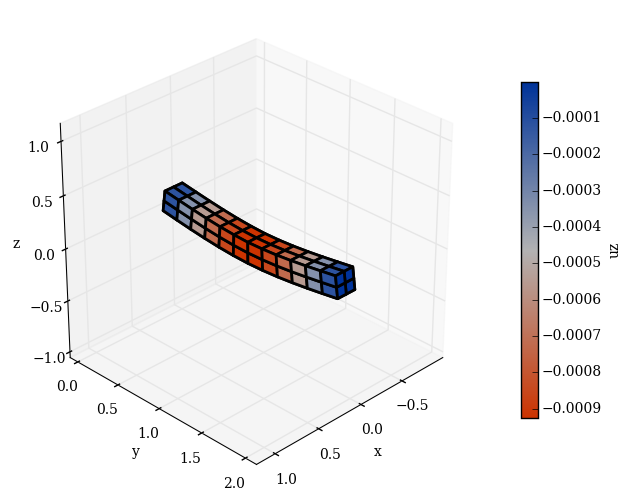

In [21]:
mplot(domain, field="uz", warpscale=100.0)